In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Height-Weight Data.csv')#csv file link upload and read 

In [3]:
df.head() # call first few rows of Pandas DataFrame

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.shape # call data frame size 

(3501, 2)

Text(0.5, 1.0, 'Height-Weight Data')

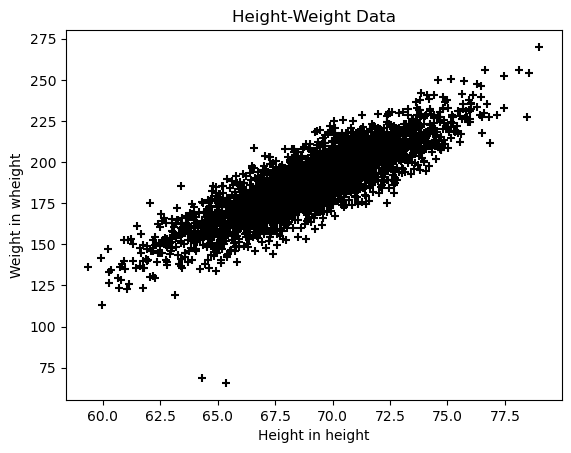

In [5]:
plt.scatter(df.Height , df.Weight, color='black', marker='+')# data analize by scatter.
plt.xlabel('Height in height') #xlabel customise in height.
plt.ylabel('Weight in wheight')#ylabel customise in weight.
plt.title('Height-Weight Data')#it's title customisation.
# its all about scatter pyplot for customisation.

In [6]:
x = df.drop('Weight', axis=1)# data saparate by use drop function. seperate or drop collem by axis=1 , it's defult-axis=0.
y = df[['Weight']]

In [7]:
x.head()# seperate height

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [8]:
y.head()# seperate weight

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [9]:
y.shape # data size

(3501, 1)

In [10]:
x.shape # data size

(3501, 1)

In [11]:
x.mean()# calculate the dataframe of height

Height    69.024411
dtype: float64

In [12]:
y.mean()# calculate the dataframe of weight

Weight    186.891258
dtype: float64

In [13]:
from sklearn.model_selection import train_test_split # traning and testing seperation 

In [14]:
train, test = train_test_split(df, test_size=.25) # testiong data 25%

In [15]:
train.shape # this is the training data size which is 75%

(2625, 2)

In [16]:
test.shape #testiong data 25%

(876, 2)

In [17]:
train.head() # call first few rows of Pandas DataFrame but then we need to seperate again. so it's not a proper waye for seperation

,Height,Weight
739,68.364635,193.981748
2381,69.329852,178.954374
2628,70.415730,216.214906
3175,69.220668,168.521567
2009,71.116177,202.655919


# now seperate

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.25, random_state=0) # height and weight devided and seperate. this is the best option for seperation

In [19]:
xtrain.head() # call first few rows of Pandas DataFrame but is a proper way for seperation

,Height
1310,67.847749
3153,65.215556
3333,63.873409
1002,69.156982
1765,68.503261


In [20]:
ytrain.head() # call first few rows of Pandas DataFrame

,Weight
1310,153.031321
3153,174.931143
3333,152.554620
1002,206.515190
1765,193.982059


# linear regression

In [21]:
from sklearn.linear_model import LinearRegression #import linear regression and lr regression creat

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(xtrain, ytrain) # data training model calculation

LinearRegression()

In [24]:
m = lr.coef_
m # extract the coefficients linear regression model.

array([[5.96613032]])

In [25]:
c = lr.intercept_
c #extract the intercept linear regression model.

array([-224.98706384])

In [26]:
yp = (m*63)+c
yp # predictin of height = 63

array([[150.87914646]])

In [27]:
lr.predict([[68]]) #predictin of height = 68 predict function.

array([[180.70979807]])

In [28]:
x.head() # call first few rows of Pandas DataFrame

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [29]:
df['predicted_Weight'] = lr.predict(x)
df.head() # show differance of actual and prediction.

,Height,Weight,predicted_Weight
0,73.847017,241.893563,215.593864
1,68.781904,162.310473,185.374740
2,74.110105,212.740856,217.163483
3,71.730978,220.042470,202.969301
4,69.881796,206.349801,191.936837


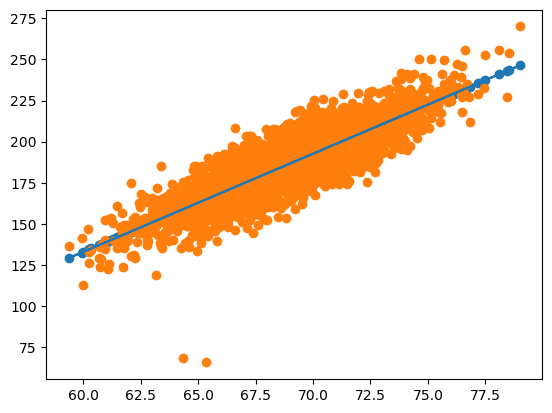

In [30]:
plt.plot(x, df[['predicted_Weight']])# drow the predicted result.
plt.scatter(x, df[['predicted_Weight']])# drow the predicted result in the scatter .
plt.scatter(x, df[['Weight']])# show and draw the total result.

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [32]:
mse = mean_squared_error(ytest, lr.predict(xtest)) #calculate mean_squared_error.
mae = mean_absolute_error(ytest, lr.predict(xtest)) #calculate mean_absolute_error.

In [33]:
mse # mean_absolute_error result 

103.70875574105973

In [34]:
mae # mean_squared_error result

8.145588569833935

In [35]:
lr.score(xtest, ytest) # show testing accuracy 

0.7400625947962998

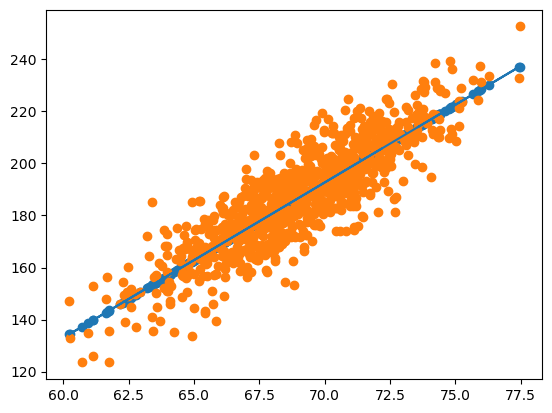

In [36]:
plt.plot(xtest, lr.predict(xtest))     # plot actual testion data.
plt.scatter(xtest, lr.predict(xtest)) # scatter xtest data .
plt.scatter(xtest, ytest) #show lose of xtest and ytest both.